# Import libraries

In [30]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
import scipy.signal as signal

# Sine Oscillator

In [3]:
def sine_osc(f0, dur, fs): 
# fs:  sampling rate
# dur: duration
# f0:  fundamental frequency

    phase_inc = 2*np.pi*f0/fs
    phase = 0
    x = np.zeros(int(fs*dur))
    
    for n in range(len(x)):
        phase = phase + phase_inc
        x[n] = np.sin(phase)
        
    return x    

fs = 44100       # sampling rate (F)
dur = 0.5       # duration, 0.5 second
f0 = 261        # frequency to generate, you can change the frequency 

x_sin = sine_osc(f0,dur,fs)

ipd.Audio(x_sin, rate=fs)



### Plot the Sine Oscillator

Text(0.5, 0, 'frequency')

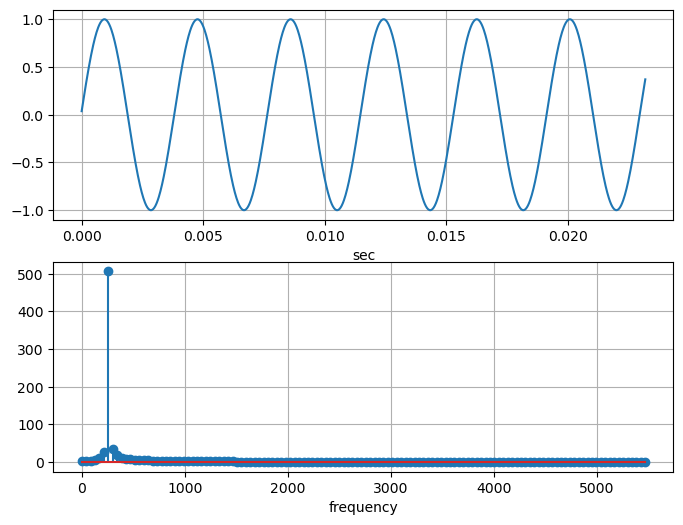

In [5]:
M = 1024

plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)
n= np.arange(M)
plt.plot(n/fs, x_sin[:M])
plt.grid(True)
plt.xlabel('sec')
plt.subplot(2,1,2)

X_sin= np.fft.fft(x_sin[:M])
M2 = int(M/8)
X_sin_mag = np.abs(X_sin[:M2])
X_f = np.arange(M2)/M*fs
plt.stem(X_f,X_sin_mag)
plt.grid(True)
plt.xlabel('frequency')


# Sawtooth Oscillator

In [6]:
def sawtooth_osc(f0, dur, fs): 
# fs:  sampling rate
# dur: duration
# f0:  fundamental frequency

    phase_inc = 2/(fs/f0)
    phase = 0
    x = np.zeros(int(fs*dur))
    
    for n in range(len(x)):
        phase = phase + phase_inc
        if (phase > 1):
            phase = phase - 2
            
        x[n] = phase
        
    return x    


fs = 44100
f0 = 261
dur = 0.5
x_saw = sawtooth_osc(f0, dur, fs)
     
# BE CAREFUL: it is LOUD!!!    
ipd.Audio(x_saw, rate=fs)



### Plot the Sawtooth Oscillator

Text(0.5, 0, 'frequency')

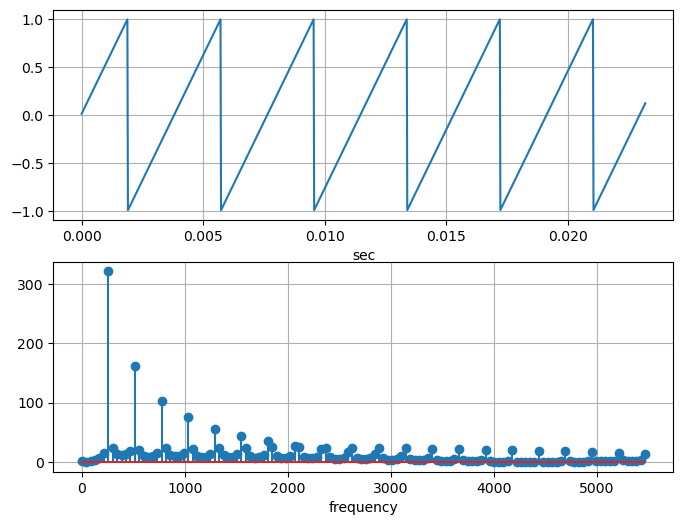

In [7]:
M = 1024

plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)
n= np.arange(M)
plt.plot(n/fs, x_saw[:M])
plt.grid(True)
plt.xlabel('sec')
plt.subplot(2,1,2)

X_saw= np.fft.fft(x_saw[:M])
M2 = int(M/8)
X_saw_mag = np.abs(X_saw[:M2])
X_f = np.arange(M2)/M*fs
plt.stem(X_f,X_saw_mag)
plt.grid(True)
plt.xlabel('frequency')


Note that this sawtooth oscillator has aliasing noise which becomes more discernable as the sampling rate is lower. 

# Square Oscillator

In [8]:
def square_osc(f0, dur, fs): 
# fs:  sampling rate
# dur: duration
# f0:  fundamental frequency

    phase_inc = 2/(fs/f0)
    phase = 0
    x = np.zeros(int(fs*dur))
    
    for n in range(len(x)):
        phase = phase + phase_inc
        if (phase > 1):
            phase = phase - 2
            
        if phase > 0: 
            x[n] = 0.99
        else: 
            x[n] = -0.99
        
    return x    


fs = 44100
f0 = 261
dur = 0.5
x_sqr = square_osc(f0, dur, fs)


# BE CAREFUL: it is LOUD!!!    
ipd.Audio(x_sqr, rate=fs)



### Plot the Square Oscillator

Text(0.5, 0, 'frequency')

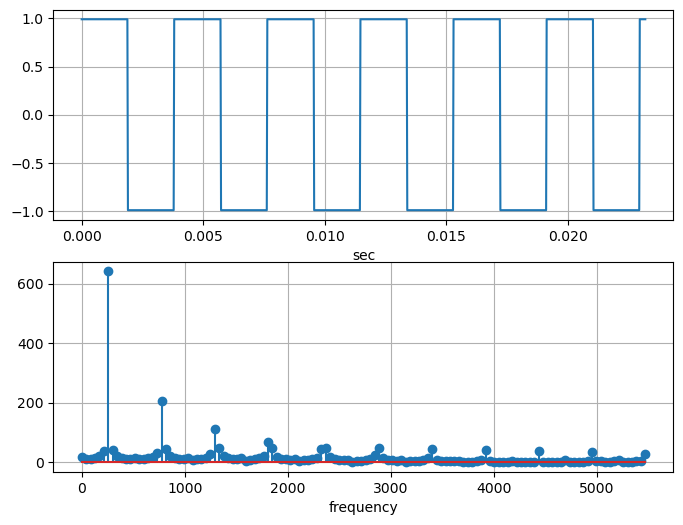

In [9]:
M = 1024

plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)
n= np.arange(M)
plt.plot(n/fs, x_sqr[:M])
plt.grid(True)
plt.xlabel('sec')
plt.subplot(2,1,2)

X_sqr= np.fft.fft(x_sqr[:M])
M2 = int(M/8)
X_sqr_mag = np.abs(X_sqr[:M2])
X_f = np.arange(M2)/M*fs
plt.stem(X_f,X_sqr_mag)
plt.grid(True)
plt.xlabel('frequency')

# Square Oscillator with PWM

In [19]:
def square_osc_pwn(f0, dur, ds, fs): 
# fs:  sampling rate
# dur: duration
# ds: duty cycle, range [0, 1], default=0.5 
# f0:  fundamental frequency

    phase_inc = 2/(fs/f0)
    phase = 0
    x = np.zeros(int(fs*dur))
    ds_level = 1 - 2*ds
    ds_level = 0.9*ds_level  # to avoid a constant singal
    
    for n in range(len(x)):
        phase = phase + phase_inc
        if (phase > 1):
            phase = phase - 2
            
        if phase > ds_level: 
            x[n] = 0.99
        else: 
            x[n] = -0.99
        
    return x    


fs = 44100
f0 = 261
dur = 0.5
ds = 0.3
x_sqr_pwm = square_osc_pwn(f0, dur, ds, fs)


# BE CAREFUL: it is LOUD!!!    
ipd.Audio(x_sqr_pwm, rate=fs)


### Plot the Square Oscillator with PWM

Text(0.5, 0, 'frequency')

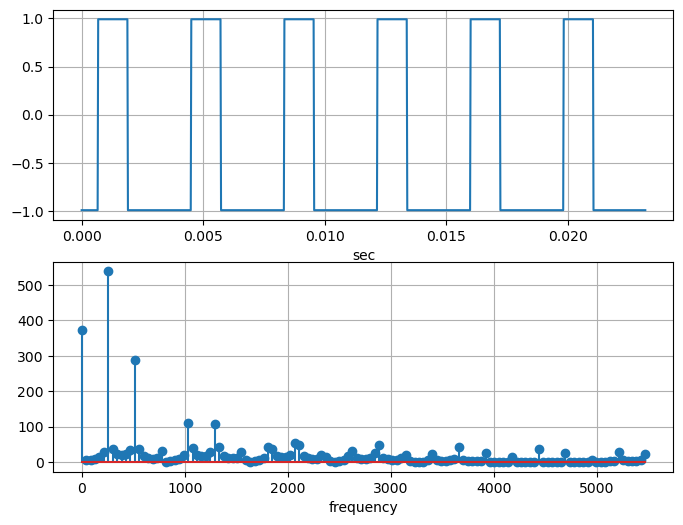

In [20]:
M = 1024

plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)
n= np.arange(M)
plt.plot(n/fs, x_sqr_pwm[:M])
plt.grid(True)
plt.xlabel('sec')
plt.subplot(2,1,2)

X_sqr_pwm= np.fft.fft(x_sqr_pwm[:M])
M2 = int(M/8)
X_sqr_pwm_mag = np.abs(X_sqr_pwm[:M2])
X_f = np.arange(M2)/M*fs
plt.stem(X_f,X_sqr_pwm_mag)
plt.grid(True)
plt.xlabel('frequency')

Note that this square oscillator has aliasing noise which becomes more discernable as the sampling rate is lower. 

# Noise Oscillator

In [21]:
def noise_osc(dur, fs): 
# fs:  sampling rate
# dur: duration
    x = (np.random.rand(int(fs*dur))-0.5)/2
    
    return x    


fs = 44100       # sampling rate (F)
dur = 0.5        # duration, 0.5 second
x_noise = noise_osc(dur, fs)


# BE CAREFUL: it is LOUD!!!    
ipd.Audio(x_noise, rate=fs)



### Plot the Noise Oscillator

Text(0.5, 0, 'frequency')

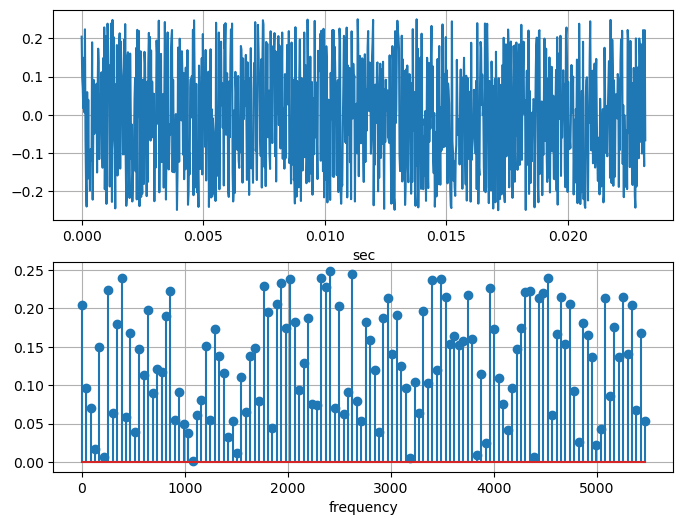

In [22]:
M = 1024

plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)
n= np.arange(M)
plt.plot(n/fs, x_noise[:M])
plt.grid(True)
plt.xlabel('sec')
plt.subplot(2,1,2)

X= np.fft.fft(x_noise[:M])
M2 = int(M/8)
X_noise_mag = np.abs(x_noise[:M2])
X_f = np.arange(M2)/M*fs
plt.stem(X_f,X_noise_mag)
plt.grid(True)
plt.xlabel('frequency')

# Envelope Generator


Text(0.5, 0, 'sec')

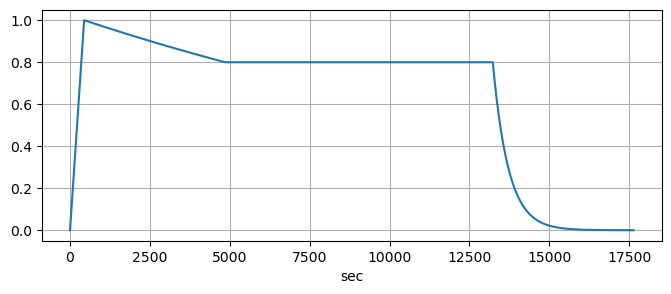

In [208]:
def envelop(note_dur, attack_time, decay_time, sustain_level, release_time, fs): 
# fs: sampling rate
# note_dur: time interval between the onsets of attack and release 
# attack_time: in second
# decay_time: in second
# sustain_level: in second
# release_time: second 

    env_attack = np.linspace(0,1,int(attack_time*fs))
    env_decay = np.logspace(np.log10(1),np.log10(sustain_level),int(decay_time*fs))
    env_sustain = np.linspace(sustain_level,sustain_level,int((note_dur-release_time-decay_time-attack_time)*fs))
    env_release = np.logspace(np.log10(sustain_level),np.log10(0.0001),int(release_time*fs))

    env = np.append(env_attack, env_decay)
    env = np.append(env, env_sustain)
    env = np.append(env, env_release)
    
    if len(env) < int(note_dur*fs):
        env = np.append(env, np.zeros( int(note_dur*fs)-len(env)))
    else:
        env=env[:int(note_dur*fs)]

    return env    

# amplitude envelope
amp_attack_time = 0.01 
amp_decay_time = 0.1  
amp_sustain_level = 0.8  
amp_release_time = 0.1 

fs = 44100
note_dur = 0.4 
amp_env = envelop(note_dur, amp_attack_time, amp_decay_time, amp_sustain_level, amp_release_time, fs)


plt.figure(figsize=(8, 3))
plt.plot(amp_env)
plt.grid(True)
plt.xlabel('sec')

# Oscillators + Amplitude Envelop

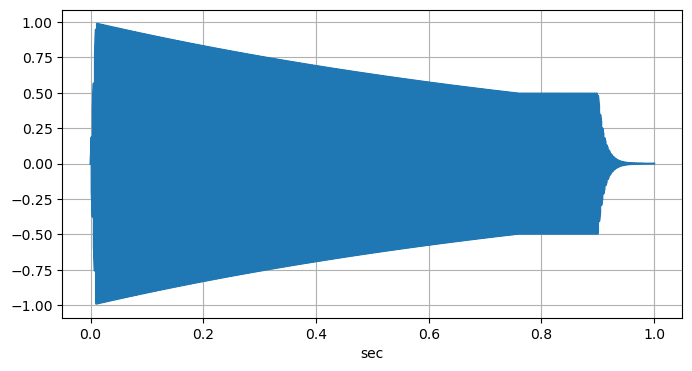

In [228]:
fs = 44100
f0 = 261

note_dur = 1.0

amp_attack_time = 0.01 
amp_decay_time = 0.75 
amp_sustain_level = 0.5  
amp_release_time = 0.1 

# osc
x_note = square_osc(f0, note_dur, fs) 

# amp_envelop
amp_env = envelop(note_dur, amp_attack_time, amp_decay_time, amp_sustain_level, amp_release_time, fs)
x_note = amp_env*x_note


plt.figure(figsize=(8, 4))
n= np.arange(len(x_note))
plt.plot(n/fs, x_note)
plt.grid(True)
plt.xlabel('sec')


ipd.Audio(x_note, rate=fs)



# Filters

In [211]:
def res_lowpass(cutoff_freq, Q, fs):
# x: input signal
# cutoff_freq: cut-off frquency, Hz
# Q: resonance, a small positive value (e.g. 0.001)to +inf

    # bi-quad lowpass filter
    theta = 2*np.pi*cutoff_freq/fs
    alpha = np.sin(theta)/2/Q
    b = [(1-np.cos(theta)), 2*(1-np.cos(theta)), (1-np.cos(theta))]
    a = [(1+alpha), -2*np.cos(theta), (1-alpha)]

    return b,a 


def res_highpass(x, cutoff_freq, Q, fs):
# x: input signal
# cutoff_freq: cut-off frquency, Hz
# Q: resonance, a small positive value (e.g. 0.001)to +inf

    # bi-quad highpass filter
    theta = 2*np.pi*cutoff_freq/fs
    alpha = np.sin(theta)/2/Q
    b = [(1+np.cos(theta)), -2*(1+np.cos(theta)), (1+np.cos(theta))]
    a = [(1+alpha), -2*np.cos(theta), (1-alpha)]

    return b,a 


def res_bandpass(x, cutoff_freq, Q, fs):
# x: input signal
# cutoff_freq: cut-off frquency, Hz
# Q: resonance, a small positive value (e.g. 0.001)to +inf

    # bi-quad bandpass filter
    theta = 2*np.pi*cutoff_freq/fs
    alpha = np.sin(theta)/2/Q
    b = [alpha, 0, -alpha]
    a = [(1+alpha), -2*np.cos(theta), (1-alpha)]

    return b,a 



# Oscillators + Filters + Amplitude Envelop

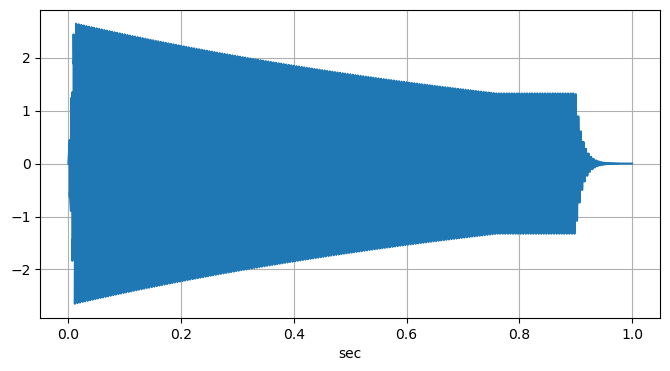

In [225]:

fs = 44100
f0 = 220
cutoff_freq = 5000 
Q = 1  

note_dur = 1.0 

amp_attack_time = 0.01 
amp_decay_time = 0.75 
amp_sustain_level = 0.5  
amp_release_time = 0.1 

# osc 
x_note = square_osc(f0, note_dur, fs)

# filter
[b, a] = res_lowpass(cutoff_freq, Q, fs) 
x_note = signal.lfilter(b, a, x_note)

# envelope
amp_env = envelop(note_dur, amp_attack_time, amp_decay_time, amp_sustain_level, amp_release_time, fs)
x_note = amp_env*x_note

plt.figure(figsize=(8, 4))
n= np.arange(len(x_note))
plt.plot(n/fs, x_note)
plt.grid(True)
plt.xlabel('sec')


ipd.Audio(x_note, rate=fs)

# Oscillators + Filters + Filter Envelope+ Amplitude Envelop

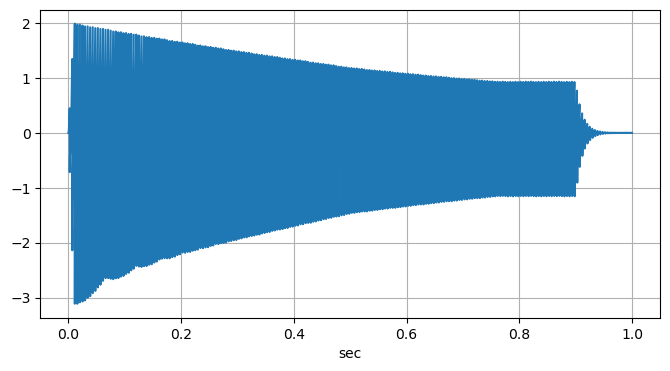

In [224]:

fs = 44100
f0 = 220
cutoff_freq = 10000 
Q = 1

note_dur = 1.0

amp_attack_time = 0.01 
amp_decay_time = 0.75 
amp_sustain_level = 0.5  
amp_release_time = 0.1 

filt_attack_time = 0 
filt_decay_time = 0.5  
filt_sustain_level = 0.1 
filt_release_time = 0.0 

filt_env = envelop(note_dur, filt_attack_time, filt_decay_time, filt_sustain_level, filt_release_time, fs)
amp_env = envelop(note_dur, amp_attack_time, amp_decay_time, amp_sustain_level, amp_release_time, fs)


# oscillator
x_note = sawtooth_osc(f0, note_dur, fs)

# time-varying filter
[xz1,xz2,yz1,yz2] = [0,0,0,0]
y_note = np.zeros(len(x_note))

for i in range(len(x_note)):
    cutoff_freq_i = cutoff_freq*filt_env[i]
    b, a = res_lowpass(cutoff_freq_i, Q, fs) 
    
    # bi-quad filter
    y_note[i] = (b[0]*x_note[i] + b[1]*xz1 + b[2]*xz1 - a[1]*yz1 - a[2]*yz2)/a[0]
    xz2 = xz1
    xz1 = x_note[i]
    yz2 = yz1
    yz1 = y_note[i]

# envelope    
y_note = amp_env*y_note

plt.figure(figsize=(8, 4))
n= np.arange(len(y_note))
plt.plot(n/fs, y_note)
plt.grid(True)
plt.xlabel('sec')

ipd.Audio(y_note, rate=fs)

# Multiple Oscillators + Filters + Filter Envelope+ Amplitude Envelop

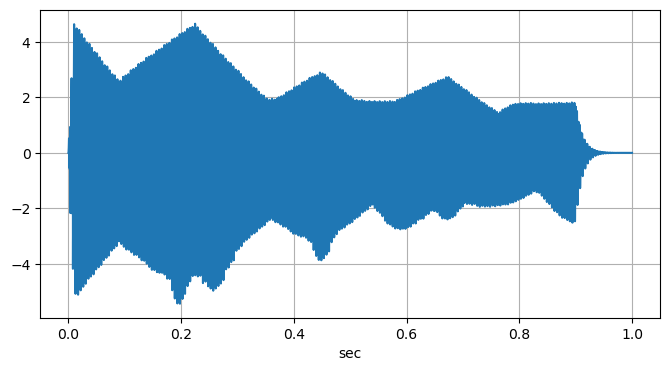

In [230]:

fs = 44100
f0 = 220
cutoff_freq = 6000 
Q = 1

note_dur = 1.0

amp_attack_time = 0.01 
amp_decay_time = 0.75 
amp_sustain_level = 0.5  
amp_release_time = 0.1 

filt_attack_time = 0 
filt_decay_time = note_dur  
filt_sustain_level = 0.1 
filt_release_time = 0.0 

filt_env = envelop(note_dur, filt_attack_time, filt_decay_time, filt_sustain_level, filt_release_time, fs)
amp_env = envelop(note_dur, amp_attack_time, amp_decay_time, amp_sustain_level, amp_release_time, fs)


# oscillator
x_note = sawtooth_osc(f0, note_dur, fs) \
    + sawtooth_osc(f0+f0*np.power(2,20/1200), note_dur, fs) \
    + sawtooth_osc(f0+f0*np.power(2,-15/1200), note_dur, fs)

# time-varying filter
[xz1,xz2,yz1,yz2] = [0,0,0,0]
y_note = np.zeros(len(x_note))

for i in range(len(x_note)):
    cutoff_freq_i = cutoff_freq*filt_env[i]
    b, a = res_lowpass(cutoff_freq_i, Q, fs) 
    
    # bi-quad filter
    y_note[i] = (b[0]*x_note[i] + b[1]*xz1 + b[2]*xz1 - a[1]*yz1 - a[2]*yz2)/a[0]
    xz2 = xz1
    xz1 = x_note[i]
    yz2 = yz1
    yz1 = y_note[i]

# envelope    
y_note = amp_env*y_note

ipd.Audio(y_note, rate=fs)

plt.figure(figsize=(8, 4))
n= np.arange(len(y_note))
plt.plot(n/fs, y_note)
plt.grid(True)
plt.xlabel('sec')

ipd.Audio(y_note, rate=fs)